## roots
numpy.roots works directly for polynomials and gives all roots at once, real and complex.

In [11]:
# solve : x^2 - 3x + 2 = 0, we know the roots are x=1,2
import numpy as np

# Coefficients of x^2 - 3x + 2
coeffs = [1, -3, 2]

roots = np.roots(coeffs)
print(f"Roots: {roots}")

Roots: [2. 1.]


In [4]:
# STEP1: Lets generate an equation that has roots: [2, -3, 5, 1, 6]
import numpy as np

# Given roots
roots = [2, -3, 5, 1, 6]

# Generate polynomial coefficients from roots
coeffs = np.poly(roots)  # Returns coefficients of the polynomial

print(f"Polynomial coefficients: {coeffs}")

# # Now find the roots again (should match original)
# calculated_roots = np.roots(coeffs)
# print(f"Roots: {calculated_roots}")

Polynomial coefficients: [   1.  -11.   23.   83. -276.  180.]


In [3]:
# STEP2: Now find the roots again (should match original)
# solve : x^5 -11x^4 + 23x^3 + 83x^2 - 276x^1 + 180 = 0

# Coefficients of x^5 -11x^4 + 23x^3 + 83x^2 - 276x^1 + 180
coeffs = [1, -11, 23, 83, -276, 180]

roots = np.roots(coeffs)
print(f"Roots: {roots}")

# GREAT..it matches

Roots: [-3.  6.  5.  2.  1.]


In [12]:
# Lets solve equation that has complex roots
# solve x^3 - x - 2=0

# Coefficients of x^3 - x - 2
coeffs = [1, 0, -1, -2]

roots = np.roots(coeffs)
print(f"Roots: {roots}")

Roots: [ 1.52137971+0.j         -0.76068985+0.85787363j -0.76068985-0.85787363j]


## fsolve

**scipy.optimize** is a SciPy module with many tools for optimization (minimizing or maximizing functions) and solving equations.

**fsolve** is a numerical solver for finding the roots of (non-linear) equations. It uses numerical methods like the **Newton-Raphson method** under the hood.

**Any time you can write “I want f(x) = 0 but I can’t solve it by hand”, fsolve is your friend.**

### part1
Lets solve quad equations whose roots we know: x=1,2
- y =  x^2 - 3x + 2 

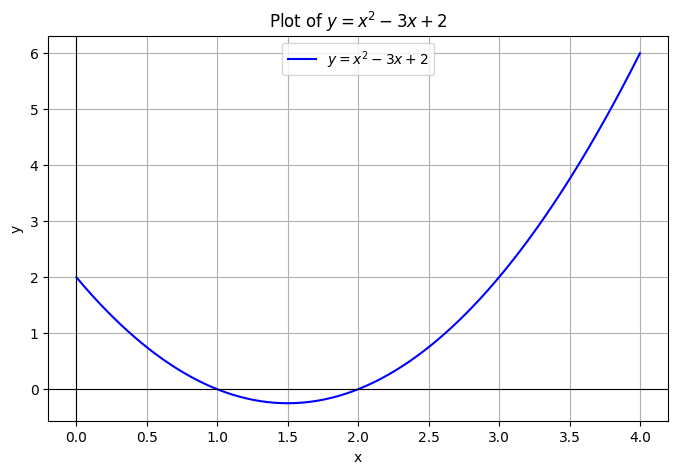

In [8]:
# Lets plot the curve first so we know how it looks
import numpy as np
import matplotlib.pyplot as plt

# Define the quadratic function
def quadratic(x):
    return x**2 - 3*x + 2

# Create an array of x values
x = np.linspace(0, 4, 400)  # x from 0 to 4 with 400 points
y = quadratic(x)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$y = x^2 - 3x + 2$', color='blue')

# Add x-axis and y-axis
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

# Labels and title
plt.title('Plot of $y = x^2 - 3x + 2$')
plt.xlabel('x')
plt.ylabel('y')

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


### we see that roots are 1 and 2

In [10]:
# Now we solve above using fsolve
from scipy.optimize import fsolve

# Example: solve x^2 - 3x + 2 = 0
# Here the roots are x=2,1
def equation(x):
    return x**2 - 3*x + 2

root1 = fsolve(equation, x0=1.6) # Initial guess near x = 2
root2 = fsolve(equation, x0=0.5) # Initial guess near x = 1

print(f"Root1: {root1[0]:.4f}")
print(f"Root2: {root2[0]:.4f}")

Root1: 2.0000
Root2: 1.0000


In [5]:
# (OPTIONAL) NOTE: I can use lambda to solve above
from scipy.optimize import fsolve

# Solve x^2 - 3x + 2 = 0 using a lambda function
root1 = fsolve(lambda x: x**2 - 3*x + 2, x0=1.6)  # Initial guess near x = 2
root2 = fsolve(lambda x: x**2 - 3*x + 2, x0=0.5)  # Initial guess near x = 1

print(f"Root1: {root1[0]:.4f}")
print(f"Root2: {root2[0]:.4f}")


Root1: 2.0000
Root2: 1.0000


## part2
Lets solve y = x^3 - x - 2

We know that this has complex roots.


In [1]:
from scipy.optimize import fsolve

# Example: solve x^3 - x - 2 = 0
def equation(x):
    return x**3 - x - 2

root = fsolve(equation, x0=1.5)  # Initial guess
print(f"Root of equation: {root[0]:.4f}")

# NOTE: a good starting point is important — bad guesses may lead to no solution or the wrong root.

Root of equation: 1.5214


## part3
you have a complex equation that relates pressure and temperature via the Antoine equation:

### Antoine Equation Example

**Objective:** Find the boiling point of water at 1 atm using the Antoine equation.

The Antoine equation is:

$$
P = 10^{\left( A - \frac{B}{T + C} \right)}
$$

or

$$
10^{\left( A - \frac{B}{T + C} \right)} - P = 0
$$


where:
- P  = vapor pressure (mmHg)  
- T = temperature (°C)  
- A, B, C = substance-specific constants

**For water (approximate values):**
- A = 8.07131 
- B = 1730.63
- C = 233.426

We want to solve for T  when P = 760  mmHg (1 atm).

**NOTE: It is not easy to find T using pencil and paper because of non-linear relation between P and T**

In [6]:
# version1: Here A,B,C are hard coded in function
from scipy.optimize import fsolve

def antoine_equation(T):
    A, B, C = 8.07131, 1730.63, 233.426  # water example
    P_given = 760  # mmHg (1 atm)
    return 10**(A - B / (T + C)) - P_given

boiling_point = fsolve(antoine_equation, x0=100)
print(f"Boiling point: {boiling_point[0]:.2f} °C")


Boiling point: 100.00 °C


In [7]:
# version2: Here A,B,C are are supplied by user
from scipy.optimize import fsolve

# Antoine equation solver accepting A, B, C
def antoine_equation(A, B, C, P_given=760):
    equation = lambda T: 10**(A - B / (T + C)) - P_given
    boiling_point = fsolve(equation, x0=100)
    return boiling_point[0]

# Example: for water: A, B, C = 8.07131, 1730.63, 233.426
A = float(input("Enter A: "))
B = float(input("Enter B: "))
C = float(input("Enter C: "))
# A, B, C = 8.07131, 1730.63, 233.426 

bp = antoine_equation(A, B, C)
print(f"Boiling point: {bp:.2f} °C")


Enter A:  8
Enter B:  1730
Enter C:  233


Boiling point: 104.94 °C


## part4
Solve:  
cos(x) = x

=> cos(x) − x = 0

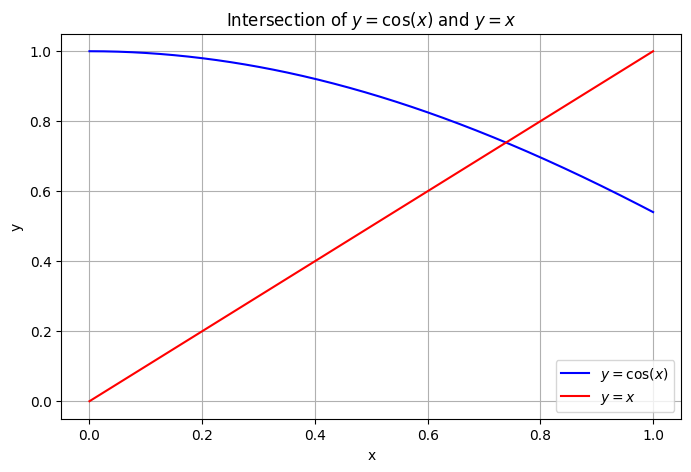

In [19]:
# version1: 
# Lets plot y=cos(x) and y=x on same graph and see where they meet. This meeting point would be the solution.
import numpy as np
import matplotlib.pyplot as plt

# Create x values
x = np.linspace(0, 1, 400)
y1 = np.cos(x)
y2 = x

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y1, label=r'$y = \cos(x)$', color='blue')
plt.plot(x, y2, label=r'$y = x$', color='red')


# Labels and styling
plt.title('Intersection of $y = \cos(x)$ and $y = x$')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

#### seems like they meet between 0.7 and 0.8

In [8]:
# version2: Find the accurate answer using fsolve
from scipy.optimize import fsolve
import numpy as np

# Define the function f(x) = cos(x) - x
def equation(x):
    return np.cos(x) - x

# Use fsolve with an initial guess near the root
root = fsolve(equation, x0=0.5)

print(f"Root of cos(x) - x = 0: {root[0]:.4f}")

Root of cos(x) - x = 0: 0.7391
